开始训练...
Epoch [  20/2000], Loss: 0.41921
Epoch [  40/2000], Loss: 0.26698
Epoch [  60/2000], Loss: 0.18778
Epoch [  80/2000], Loss: 0.12596
Epoch [ 100/2000], Loss: 0.06389
Epoch [ 120/2000], Loss: 0.03759
Epoch [ 140/2000], Loss: 0.02273
Epoch [ 160/2000], Loss: 0.01951
Epoch [ 180/2000], Loss: 0.01699
Epoch [ 200/2000], Loss: 0.02324
Epoch [ 220/2000], Loss: 0.01733
Epoch [ 240/2000], Loss: 0.01822
Epoch [ 260/2000], Loss: 0.01963
Epoch [ 280/2000], Loss: 0.01545
Epoch [ 300/2000], Loss: 0.01507
Epoch [ 320/2000], Loss: 0.01977
Epoch [ 340/2000], Loss: 0.01653
Epoch [ 360/2000], Loss: 0.01463
Epoch [ 380/2000], Loss: 0.01358
Epoch [ 400/2000], Loss: 0.01452
Epoch [ 420/2000], Loss: 0.01255
Epoch [ 440/2000], Loss: 0.01949
Epoch [ 460/2000], Loss: 0.01243
Epoch [ 480/2000], Loss: 0.01371
Epoch [ 500/2000], Loss: 0.00972
Epoch [ 520/2000], Loss: 0.00936
Epoch [ 540/2000], Loss: 0.00871
Epoch [ 560/2000], Loss: 0.01025
Epoch [ 580/2000], Loss: 0.01118
Epoch [ 600/2000], Loss: 0.00866
Ep

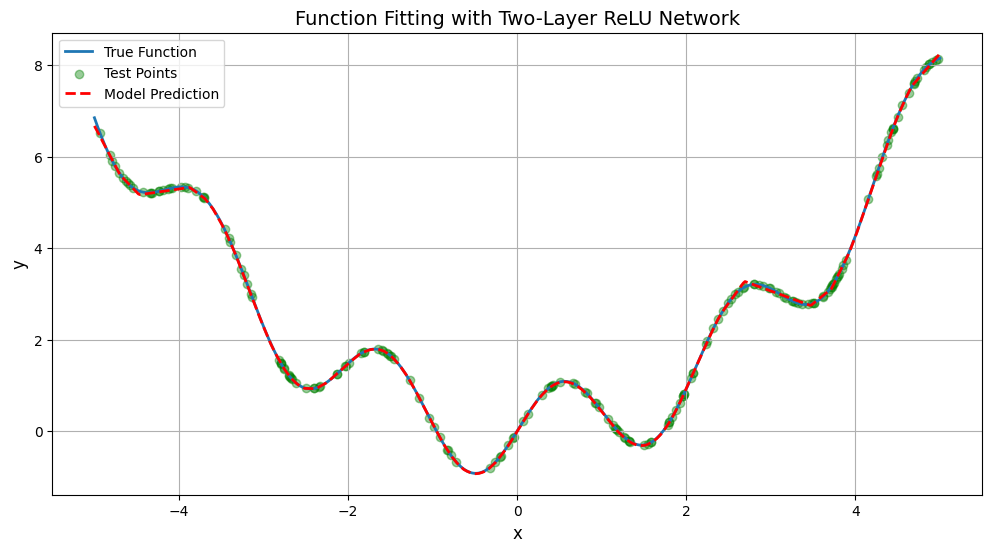

In [18]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader
import matplotlib.pyplot as plt

# 设置随机种子保证可重复性
torch.manual_seed(42)
np.random.seed(42)

# 1. 定义目标函数
def target_function(x):
    return np.sin(3 * x) + 0.3 * x**2

# 2. 生成数据集
def generate_data():
    # 训练数据 (1000个样本)
    x_train = np.random.uniform(-5, 5, size=(1000, 1)).astype(np.float32)
    y_train = target_function(x_train).astype(np.float32)
    
    # 测试数据 (200个样本)
    x_test = np.random.uniform(-5, 5, size=(200, 1)).astype(np.float32)
    y_test = target_function(x_test).astype(np.float32)
    
    # 转换为PyTorch张量
    x_train_tensor = torch.from_numpy(x_train)
    y_train_tensor = torch.from_numpy(y_train)
    x_test_tensor = torch.from_numpy(x_test)
    y_test_tensor = torch.from_numpy(y_test)
    
    return (x_train_tensor, y_train_tensor), (x_test_tensor, y_test_tensor)

# 3. 定义神经网络模型
class ReLUNet(nn.Module):
    def __init__(self, hidden_size=128):
        super(ReLUNet, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(1, hidden_size),  # 输入层 -> 隐藏层
            nn.ReLU(),                   # ReLU激活
            nn.Linear(hidden_size, int(hidden_size/2)),    # 隐藏层 -> 隐藏层
            nn.ReLU(),                 # ReLU激活
            nn.Linear(int(hidden_size/2), 1)  # 隐藏层 -> 输出层
        )
    
    def forward(self, x):
        return self.model(x)

# 4. 训练配置
def train_model(model, train_data, test_data, num_epochs=2000):
    # 数据加载器
    train_dataset = TensorDataset(train_data[0], train_data[1])
    train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
    
    # 损失函数和优化器
    criterion = nn.MSELoss()
    optimizer = optim.Adam(model.parameters(), lr=0.0005)
    
    # 训练循环
    for epoch in range(num_epochs):
        model.train()
        total_loss = 0.0
        for inputs, targets in train_loader:
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, targets)
            loss.backward()
            optimizer.step()
            total_loss += loss.item()
        
        # 每20个epoch打印进度
        if (epoch+1) % 20 == 0:
            avg_loss = total_loss / len(train_loader)
            print(f'Epoch [{epoch+1:4d}/{num_epochs}], Loss: {avg_loss:.5f}')
    
    # 测试评估
    model.eval()
    with torch.no_grad():
        test_outputs = model(test_data[0])
        test_loss = criterion(test_outputs, test_data[1])
    print(f'\nFinal Test Loss: {test_loss.item():.5f}')

# 5. 可视化结果
def visualize(model, test_data):
    # 生成平滑曲线数据
    x_plot = np.linspace(-5, 5, 500).reshape(-1, 1).astype(np.float32)
    x_plot_tensor = torch.from_numpy(x_plot)
    
    # 预测
    model.eval()
    with torch.no_grad():
        y_plot_pred = model(x_plot_tensor).numpy()
    
    # 绘图
    plt.figure(figsize=(12, 6))
    plt.plot(x_plot, target_function(x_plot), label='True Function', linewidth=2)
    plt.scatter(test_data[0].numpy(), test_data[1].numpy(), 
                label='Test Points', alpha=0.4, color='green')
    plt.plot(x_plot, y_plot_pred, 'r--', label='Model Prediction', linewidth=2)
    plt.title('Function Fitting with Two-Layer ReLU Network', fontsize=14)
    plt.xlabel('x', fontsize=12)
    plt.ylabel('y', fontsize=12)
    plt.legend()
    plt.grid(True)
    plt.show()

# 主程序
if __name__ == "__main__":
    # 生成数据
    (x_train, y_train), (x_test, y_test) = generate_data()
    
    # 初始化模型
    model = ReLUNet(hidden_size=128)
    
    # 训练模型
    print("开始训练...")
    train_model(model, (x_train, y_train), (x_test, y_test))
    
    # 可视化结果
    print("\n生成可视化图表...")
    visualize(model, (x_test, y_test))